In [117]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [118]:
games = pd.read_csv('./Dataset/Cleaned/cleaned_games_offset_total.csv')

In [119]:
def show_confusion_matrix(matrix, target, accuracy_score, title):

    plt.figure(figsize=(5,5))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

    matrix = matrix.astype('float')/matrix.sum(axis=1)[:,np.newaxis]

    N, D = matrix.shape
    for n in range(N):
      for d in range(D):
        plt.text(d, n, "{:0.4f}".format(matrix[n, d]), horizontalalignment="center")

    plt.xlabel('Predicted\naccuracy={:0.2f}'.format(accuracy_score))
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

## SVM
- Used the features resulted from backward elimination
- Splited the data into 30% testing and 70% training data

↓SVM for ternary classification

In [120]:
backward_selected_list = np.sort(['GK_total passes', 'GK_fouls suffered', 'GK_avg max speed', 'GK_low activity',
                                  'GK_mid activity', 'GK_high activity', 'GK_yellow', 'DF_passes_succeed', 'DF_total passes',
                                  'DF_passes accuracy', 'DF_on-target', 'DF_fouls suffered', 'DF_distance', 'DF_distance in poss',
                                  'DF_avg max speed', 'DF_low activity', 'DF_mid activity', 'DF_high activity', 'DF_red',
                                  'DF_tackles suffered losing ball', 'MF_passes_succeed', 'MF_total passes', 'MF_passes accuracy',
                                  'MF_total shots', 'MF_on-target', 'MF_time on opposite half', 'MF_time on opposite third',
                                  'MF_time on opposite pen', 'MF_avg max speed', 'MF_tackles gaining ball', 'FW_total passes',
                                  'FW_total shots', 'FW_on-target', 'FW_fouls committed', 'FW_fouls suffered', 'FW_time on opposite half',
                                  'FW_time on opposite third', 'FW_low activity', 'FW_yellow'])

# dataset
X = games[backward_selected_list]
y = games["result"]

# split training data and testing data (random_state is a random seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC(kernel='linear', C=2).fit(X_train,y_train)

↓Figure 1: Confusion Matrix(ternary classification)

Prediction:
[-1  0  1  1  0 -1  0  1  0  1  1  0 -1  0  1  1  1 -1  1 -1  1  1  1  1
  1  1  0 -1  0  1 -1 -1 -1 -1  0  1  0  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1  0 -1  0 -1 -1  1  1 -1 -1  0  1  1  1  1  1 -1  1  1  0  0 -1  1  0
 -1  1 -1  1 -1  1  1 -1 -1  1  1 -1  0 -1  0 -1  0  1  1  1  1 -1  0  1
 -1  1  1  0 -1  1  0  0 -1  0  0 -1  1  0 -1 -1 -1 -1  1 -1]
True labels:
[-1  1  1  1  1  0  1  1 -1  1  1  0  0  1  0  1  1 -1  1  1  1  0  1  1
  1  1  1 -1  1  1  0 -1 -1 -1  0  1  0  0 -1  1 -1 -1 -1  1 -1  0 -1 -1
  0 -1  0  1 -1 -1  1  1 -1  0 -1  1  1  0  1  1 -1  0  1 -1  1 -1  0 -1
 -1  1 -1 -1 -1  1  0  0 -1  0  0 -1  0 -1  1 -1  1  1 -1  0  1  0  0  1
 -1  1  1  1 -1  1 -1  0 -1 -1  0 -1  1  0  0 -1 -1 -1  1 -1]


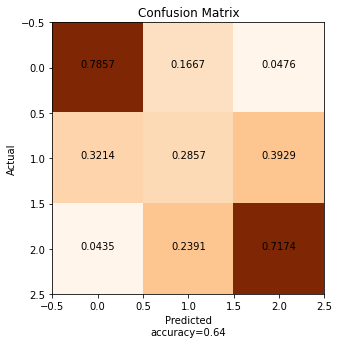

In [121]:
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Prediction:")
print(y_pred)
print("True labels:")
print(np.array(y_test))
show_confusion_matrix(cm, ['Lose', 'Tie', 'Win'], svc.score(X_test, y_test), "Confusion Matrix")

## Applied PCA to the dataset before performing binary classification

↓PCA to the dataset, and SVM for binary classification

In [143]:
# dataset
X = games[np.flip(backward_selected_list)]
y = games['result']
y[y == 0] = -1

# standardize
scaler = StandardScaler().fit_transform(X)

# perform PCA(Principal Component Analysis) with 90% of variance
pca = PCA(.90)

X_pca = pca.fit_transform(scaler)
y_pca = y

# split training data and testing data (random_state is a random seed)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.3)

# train
svc = SVC().fit(X_train, y_train)

<ipython-input-143-8eadece15a21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 0] = -1


↓Figure 2: Confusion Matrix(binary classification)

Prediction:
[-1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1]
True labels:
[ 1 -1 -1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1]


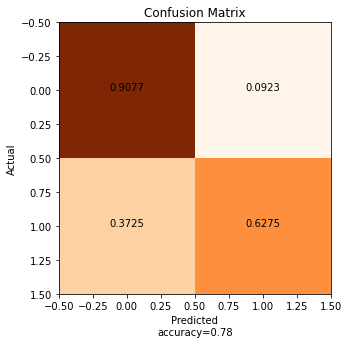

In [144]:
svc.predict(X_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Prediction:")
print(y_pred)
print("True labels:")
print(np.array(y_test))
show_confusion_matrix(cm, ['Lose', 'Win'], svc.score(X_test, y_test), 'Confusion Matrix')